In [16]:
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
from pymocker.catalogues import HaloCatalogue
from pymocker.catalogues import HaloCatalogue
from pymocker.populator import Populator
from pymocker.galaxy import VanillaGalaxy
from pymocker.sampler import Sampler
from pymocker.occupation import Zheng07Centrals, Zheng07Sats
from pymocker.positioners import IdentityPositioner, NFWPositioner

from pycorr import TwoPointCorrelationFunction

from hmd.concentration import diemer15
from astropy.cosmology import Planck18



In [2]:
halo_cat = HaloCatalogue.from_forge(node=1, snapshot=20)

In [17]:
halo_cat.concentration = diemer15(halo_cat.mass, 0., Planck18, 0.8, allow_tabulation=True)


/cosma/home/dp004/dc-cues1/HaloModel/hmd/concentration.py:191: RuntimeWarning: divide by zero encountered in log10
  np.log10(prim_haloprop)


In [18]:
print(np.median(halo_cat.concentration))

11.681683236113145


In [25]:
central_sampler = Sampler(
    occupation=Zheng07Centrals(),
    positioner=IdentityPositioner(),
)
sat_sampler = Sampler(
    occupation=Zheng07Sats(),
    positioner=NFWPositioner(),
)
galaxy = VanillaGalaxy(
    log_M_min = 13.,
    sigma_log_M = 0.5,
    kappa = 0.5,
    log_M1=13.,
    alpha=1.,
)


In [34]:
%%time

populator = Populator(
    central_sampler=central_sampler,
    satellite_sampler=sat_sampler,
)
gal_cat = populator(halo_cat=halo_cat, galaxy=galaxy)

print(len(gal_cat))

813494
CPU times: user 1.52 s, sys: 170 ms, total: 1.69 s
Wall time: 793 ms


In [27]:
print(np.sum([gt == 'central' for gt in gal_cat.gal_type])/len(gal_cat))

0.8025013091676152


In [28]:
edges = (np.logspace(-1, np.log10(50), 51), np.linspace(-1., 1., 201))

# pass e.g. mpicomm = MPI.COMM_WORLD if input positions and weights are MPI-scattered
gals_result = TwoPointCorrelationFunction('smu', edges, data_positions1=gal_cat.pos.T, 
                                     engine='corrfunc', nthreads=4, boxsize=gal_cat.boxsize,
                                     los='z')
halos_result = TwoPointCorrelationFunction('smu', edges, data_positions1=halo_cat.pos.T, 
                                     engine='corrfunc', nthreads=4, boxsize=gal_cat.boxsize,
                                     los='z')

INFO:TwoPointCorrelationFunction:Using estimator <class 'pycorr.twopoint_estimator.NaturalTwoPointEstimator'>.
INFO:TwoPointCorrelationFunction:Computing two-point counts D1D2.
INFO:TwoPointCorrelationFunction:Analytically computing two-point counts R1R2.
INFO:TwoPointCorrelationFunction:Using estimator <class 'pycorr.twopoint_estimator.NaturalTwoPointEstimator'>.
INFO:TwoPointCorrelationFunction:Computing two-point counts D1D2.
INFO:TwoPointCorrelationFunction:Analytically computing two-point counts R1R2.


In [29]:
ells = (0, 2, 4)
s, gals_xiell = gals_result(ells=ells, return_sep=True)
s, halos_xiell = halos_result(ells=ells, return_sep=True)

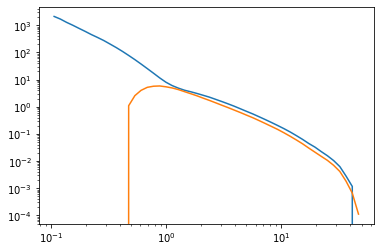

In [31]:
plt.loglog(s, gals_xiell[0])
plt.loglog(s, halos_xiell[0])

In [1]:
import pandas as pd

In [6]:
pd.read_csv('/cosma6/data/dp004/dc-arno1/CosmicEmulatorNodes/Nodes_Omm-S8-h-fR0-sigma8-As-B0_LHCrandommaximin_Seed1_Nodes50_Dim4_AddFidTrue_extended.dat',
            delimiter=r"\s+")

,Omega_m,S8,h,|f_R0|,sigma8,A_s,B0
0,0.31315,0.83954,0.673700,0.000000e+00,0.82172,2.16034e-09/2.0969200e-9,-0.000000e+00
1,0.54725,0.66642,0.786990,3.550170e-06,0.49342,5.49089e-10/2.7977310e-10,-6.021720e-06
2,0.53961,0.85542,0.683930,3.077640e-06,0.63783,1.25748e-09/6.3000749e-10,-5.169940e-06
3,0.10721,0.73513,0.610900,3.310670e-06,1.22974,6.07046e-09/6.0455634e-8,-3.600140e-06
4,0.31592,0.61685,0.688450,8.070560e-07,0.60111,1.10024e-09/1.0554600e-9,-1.057660e-06
5,0.15741,0.66044,0.710670,1.209260e-05,0.91175,2.35508e-09/8.3515000e-9,-1.371140e-05
6,0.35339,0.78021,0.780520,5.203740e-06,0.71886,1.18695e-09/9.8119635e-10,-7.080330e-06
7,0.11240,0.75539,0.793180,3.118540e-05,1.23413,3.37619e-09/2.9843197e-8,-3.405620e-05
8,0.39303,0.82585,0.752000,7.137190e-07,0.72152,1.29887e-09/9.3434406e-10,-1.012040e-06
9,0.18096,0.80599,0.761320,9.158540e-07,1.03776,2.61420e-09/6.7784175e-9,-1.059670e-06
